In [85]:
import os 
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import itertools
import seaborn as sn
import pandas as pd
resultExact = "C:/Users/davie/Desktop/results/leaveout"
resultGenus = "C:/Users/davie/Desktop/results/leaveoutgenus"
resultFamily = "C:/Users/davie/Desktop/results/leaveoutfamily"
files = os.listdir(resultExact)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
files[0]

'BaseCSV#plantPollinatorUSA'

In [150]:
def drawConfusionMatrixForLevel(path):
    precs = []
    recs = []
    files = os.listdir(path)
    cnt = 0
    for item in files:
        with open(path+"/"+item,'rb') as f:
            arr = pickle.load(f)
            result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]

            pass_in = (result,actual,allInteractions)
            precs.append(calcPrecision(pass_in))
            recs.append(calcRecall(pass_in))
            if precs[-1] < 0.05 and recs[-1] < 0.05:
                cnt +=1 
    print(cnt)
    plt.hist2d(recs, precs, bins=[10,10])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Counts')

111


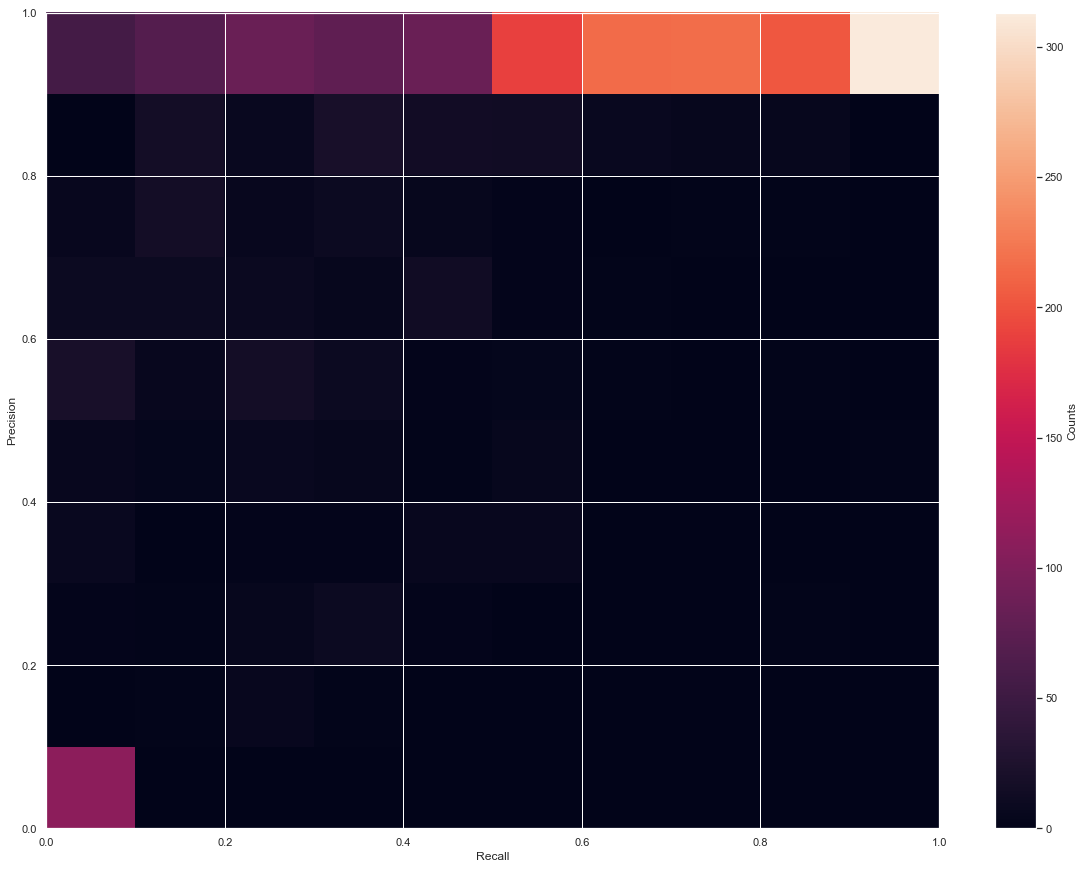

In [151]:
drawConfusionMatrixForLevel(resultExact)

89


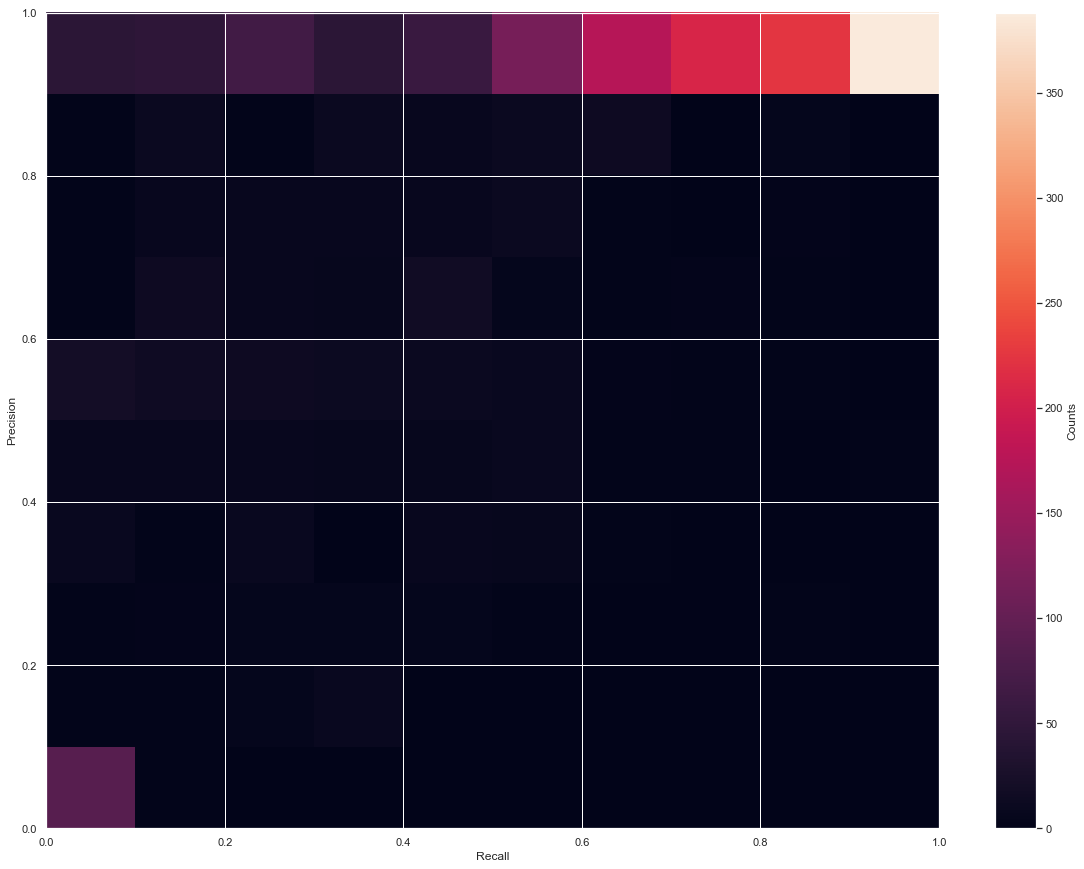

In [156]:
drawConfusionMatrixForLevel(resultGenus)

0


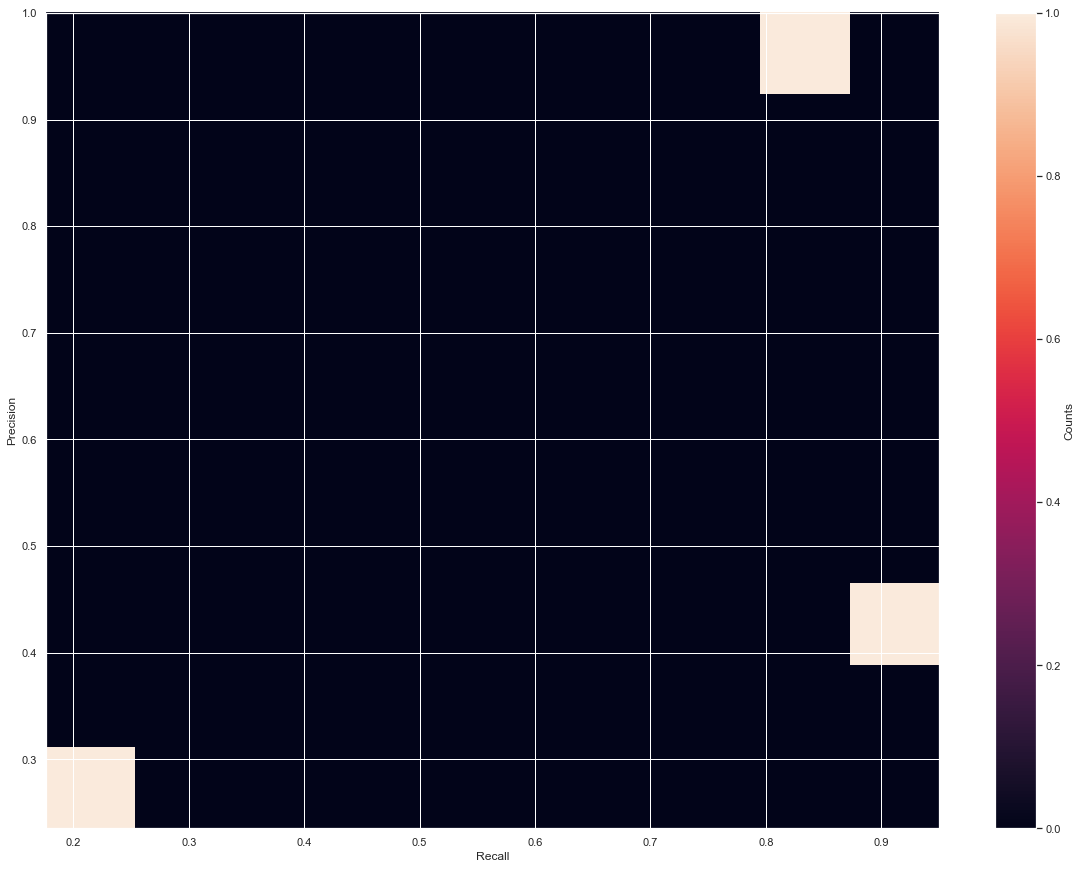

In [158]:
drawConfusionMatrixForLevel(resultFamily)

In [40]:
len(list(filter(lambda x: x[0]<0.5 and x[1]<0.5,list(zip(precs,recs)))))

80

In [152]:
def calcPrecision(results):
    try:
        generated,real,allInter = results
        tp = getTruePossitives(generated,real,allInter)
        fp = getFalsePositives(generated,real,allInter)
        return tp/(tp+fp)
    except:
        return 0.0
def calcRecall(results):
    try:
        generated,real,allInter = results
        tp = getTruePossitives(generated,real,allInter)
        fn = getFalseNegatives(generated,real,allInter)
        return tp/(tp+fn)   
    except:
        return 0.0

def showConfusionMatrix(results):
    generated,real,allInter = results
    tp = getTruePossitives(generated,real,allInter)
    fp = getFalsePositives(generated,real,allInter)
    fn = getFalseNegatives(generated,real,allInter)
    tn = getTrueNegatives(generated,real,allInter)
    array = [[tp,fp],[fn,tn]]
    df_cm = pd.DataFrame(array)
    import seaborn as sns # for data visualization
    import matplotlib.pyplot as plt # for data visualization
    plt.figure(figsize = (10,7))
    x_axis_labels = ['Present Link','Not Present Link'] # labels for x-axis
    y_axis_labels = ['Present Link','Not Present Link'] # labels for y-axis
    ax = sns.heatmap(df_cm,cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True,fmt='g',annot_kws={"fontsize":20}) # create seaborn heatmap    
    plt.xlabel('Real', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Generated', fontsize = 15) # y-axis label with fontsize 15
    plt.show()


def getTruePossitives(generated,real,allInter):
    real = set(real)
    generated = set(map(lambda x: x[1],generated))
    allInter = set(allInter)
    real = sortTuples(real)
    generated = sortTuples(generated)
    allInter = sortTuples(allInter)
    cnt = 0
    for item in allInter:
        if item in generated and item in real:
            cnt += 1
    return cnt

def getFalsePositives(generated,real,allInter):
    real = set(real)
    generated = set(map(lambda x: x[1],generated))
    allInter = set(allInter)
    real = sortTuples(real)
    generated = sortTuples(generated)
    allInter = sortTuples(allInter)
    cnt = 0
    for item in allInter:
        if item in generated and item not in real:
            cnt += 1
    return cnt

def getFalseNegatives(generated,real,allInter):
    real = set(real)
    generated = set(map(lambda x: x[1],generated))
    allInter = set(allInter)
    real = sortTuples(real)
    generated = sortTuples(generated)
    allInter = sortTuples(allInter)
    cnt = 0
    for item in allInter:
        if item not in generated and item in real:
            cnt += 1
    return cnt

def getTrueNegatives(generated,real,allInter):
    real = set(real)
    generated = set(map(lambda x: x[1],generated))
    allInter = set(allInter)
    real = sortTuples(real)
    generated = sortTuples(generated)
    allInter = sortTuples(allInter)
    cnt = 0
    for item in allInter:
        if item not in generated and item not in real:
            cnt += 1
    return cnt

def sortTuples(setOfTuples):
    return set(map(sortSingleTuple,setOfTuples))

def sortSingleTuple(tup):
    x,y = tup
    if x < y:
        return (x,y)
    elif y < x:
        return (y,x)
    else:
        return (x,y)

In [88]:
precs = []
recs = []
cnt = 0
ocnt = 0
for item in files[:]:
    with open(resultExact+"/"+item,'rb') as f:
        arr = pickle.load(f)
        result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
        pass_in = (result,actual,allInteractions)
#         showConfusionMatrix(pass_in)
        if(calcPrecision(pass_in)) <= 0.1 and (calcRecall(pass_in))  <= 0.1:
            cnt += 1
            if getFalsePositives(*pass_in) == 0:
                ocnt += 1
print(ocnt/cnt)

0.8108108108108109


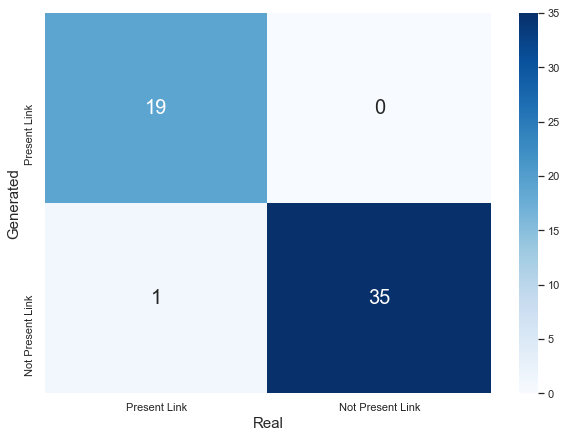

1.0 0.95
FoodsWebsCanberra#WEB45


In [153]:
precs = []
recs = []
item = 'FoodsWebsCanberra#WEB45'
with open(resultExact+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    showConfusionMatrix(pass_in)
    print(calcPrecision(pass_in),(calcRecall(pass_in)))
    print(item)

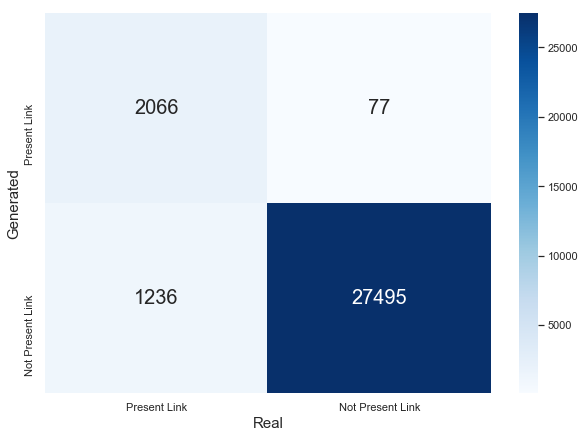

0.9640690620625292 0.6256814052089643
validation#reef_spnames


In [154]:
precs = []
recs = []
item = 'validation#reef_spnames'
with open(resultExact+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    showConfusionMatrix(pass_in)
    print(calcPrecision(pass_in),(calcRecall(pass_in)))
    print(item)

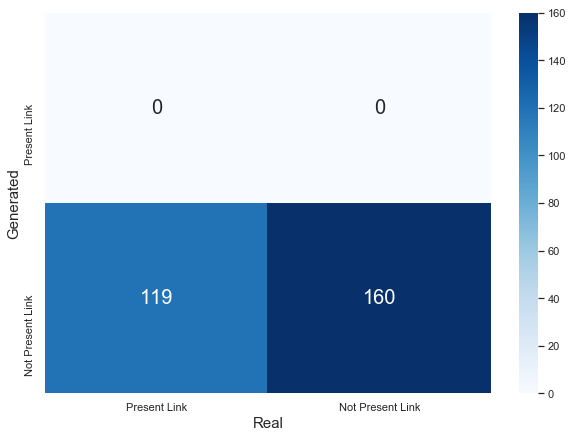

0.0 0.0
BaseCSV#plantSeed


In [155]:
precs = []
recs = []
item = 'BaseCSV#plantSeed'
with open(resultExact+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    showConfusionMatrix(pass_in)
    print(calcPrecision(pass_in),(calcRecall(pass_in)))
    print(item)